### Gentle Intro

The iris dataset

50 observations of 4 numeric varialbes for 3 species of iris

In [27]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [28]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width          Species  
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100   setosa    :50  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300   versicolor:50  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300   virginica :50  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199                  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800                  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500                  

## Classification, Regression, Clustering

* **Classification**
    * goal: predict category of new observation
        * earlier observation -> estimate ->  Classifier
        * Unseen Data  -> Classifer -> Class
    * Examples:
        * Medical diagnosis
        * Animal Recognition (cats, dogs)
    *  Qualitative Ouput, Predefined Classes
    
* **Regression**
    * goal : predict a continuous value of response from continuous values of predictors variables
        * e.g. relation weight - height linear
        * height = B0 +B1 * weight
    * Examples: 
        * predict credit scores based of previous payments
        * grades -> landing a job
    * Quantitative output
* **Clustering**
    * grouping objects in clusters
        * similar within cluster
        * dissimilar between clusters
    * Example grouping similar animal photos
        * no labels, no right or wrong, plenty possible clustering 
    * e.g. k-means   will cluster on k clusters based on similarity measure
    

            
species       1  2  3
  setosa     50  0  0
  versicolor  0  2 48
  virginica   0 36 14

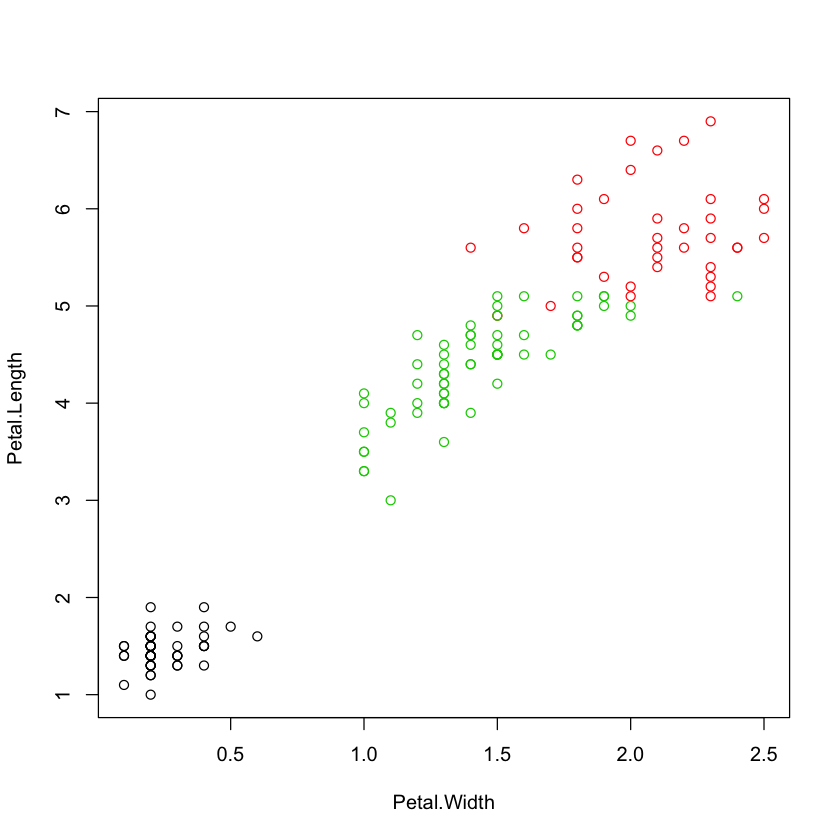

In [29]:
## example of k-means clustering on iris dataset
set.seed(1)
my_iris <- iris[-5] # chop out the factor Species column
species <- iris$Species #keep the column with factors
kmeans_iris <- kmeans(my_iris, 3) # k-means clustering
table(species, kmeans_iris$cluster)
plot(Petal.Length ~ Petal.Width, data = my_iris, col = kmeans_iris$cluster)

## Supervised vs Unsupervised

 * Superviced learning.  labeled observations are availale to the algorithm during training
 * Unsupervised learning.  do not require labeled data
     * e.g. clustering technique
     
 ### Performance of the model
 
  * Supervized learning
     * compare real labels with predicted labels
     * predicted values should be similar to real labels
        
    * Unsupervized learning:
       * no labeled data to compare to
       * techniques will be seen in the course
        
### Semi-Supervized learning

 * lots of unlabeled observation and few labeled
 * group similar observation using clustering
 
      
  
  

In [32]:
##decision tree example on siris
require(rpart)
set.seed(1)
tree <- rpart(Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, 
              data = iris, method = "class")
# Add a dataframe containing unseen observations
unseen <- data.frame(Sepal.Length = c(5.3, 7.2), 
                     Sepal.Width = c(2.9, 3.9), 
                     Petal.Length = c(1.7, 5.4), 
                     Petal.Width = c(0.8, 2.3))
# Predict the label of the unseen observations
predict(tree, unseen, type="class")

Loading required package: rpart


1         2 
   setosa virginica 
Levels: setosa versicolor virginica

       wt              hp       
 Min.   :1.513   Min.   : 52.0  
 1st Qu.:2.581   1st Qu.: 96.5  
 Median :3.325   Median :123.0  
 Mean   :3.217   Mean   :146.7  
 3rd Qu.:3.610   3rd Qu.:180.0  
 Max.   :5.424   Max.   :335.0  

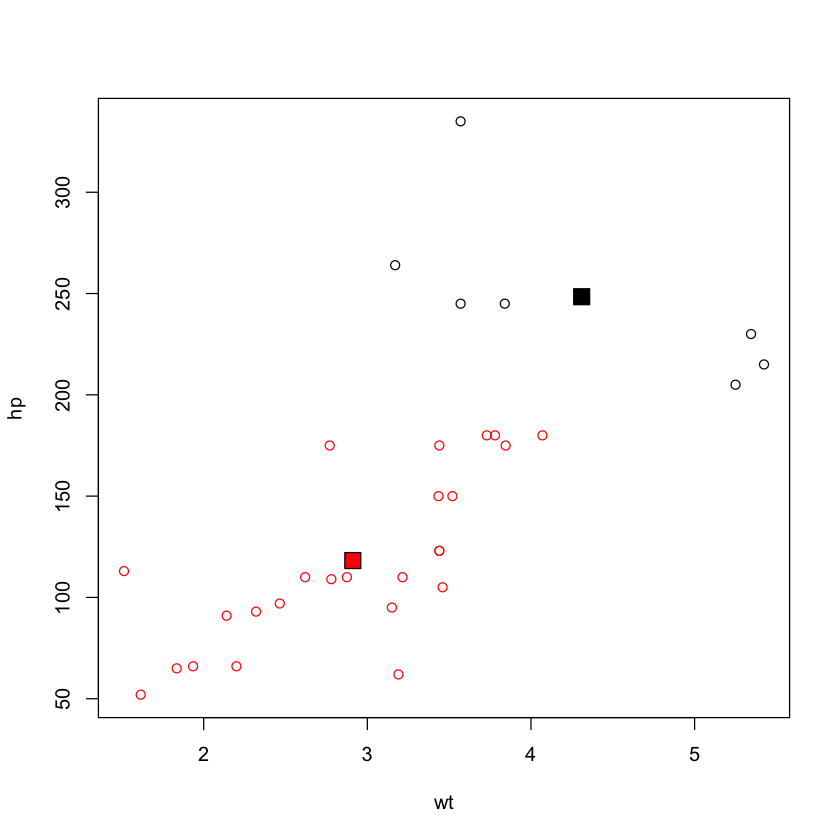

In [43]:
cars <- data.frame(mtcars[6],mtcars[4])
summary(cars)
km_cars <- kmeans(cars, 2)
#km_cars$cluster # print clusters
plot(cars, col=km_cars$cluster) # print two clusters
#add centers of clusters
points(km_cars$centers, pch = 22, bg = c(1, 2), cex = 2)

## Performance of a model

* Accuracy
* Computation time
* Interpretabiity

3 types of tasks

* Classification
* Regression
* Clustering

Accuraccy (correctly classified / total number of classified )

#### Confusion matrix for classification
 

 
|     | | prediction    |
|-----|-|---------------|
|     | | P     |  N    |
|Truth|P| TrueP | FalseN|
|     |N| FalseP| TrueN |
 
$$ Accuracy = \frac{TP+TN}{TP+TN+FP+FN} $$
$$ Precision = \frac{TP}{TP+FP} $$
$$ Recall = \frac{TP}{TP+FN} $$

#### RMSE for Regression

* Root mean Squared Error RMSE
    * (squared sum of residuals)
$$ RMSE = \sqrt{\frac{1}{N}\sum^N_{i=1} (y_i -\hat{y}_i)^2 } $$

#### Clustering
 * Similarity within each cluster
 * Similarity between clusters
 
 * Dunn's index   minimum interclaster distance / maximal diameter

In [53]:
# make a confusion matrix on a titanic dataset
set.seed(1)
# dataset about rate of survival based on few features
titanic<-read.csv(file='titanic.csv', header=TRUE)
# A decision tree classification model is built on the data
tree <- rpart(Survived ~ ., data = titanic, method = "class") #survived response, predictors all others
pred<-predict(tree, titanic, type='class') #survival predicted by model
conf<-table(titanic$Survived, pred ) # make a confusion matrix
conf
tail(titanic)

   pred
      0   1
  0 371  53
  1  78 212

,Survived,Pclass,Sex,Age
709,0,3,male,25
710,0,3,female,39
711,0,2,male,27
712,1,1,female,19
713,1,1,male,26
714,0,3,male,32


In [54]:
### compute accuracy, precision and recall
TP <- conf[2,2] 
FN <- conf[2,1] 
FP <- conf[1,2] 
TN <- conf[1,1] 

accuracy <- (TP + TN) / (TP+FN+FP+TN)
accuracy
precision <- TP/ (TP + FP)
precision 
recall <- TP / (TP + FN)
recall 

[1] 0.8165266

[1] 0.8

[1] 0.7310345